# Dataset
In this notebook we'll perform tests on the SIS Dataset.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../')

from examples.community.semantic_image_synthesis.sis_dataset import SISDataset,CELEBAHQ_DICT

img_dir_path = "/mnt/c/BUSDATA/Datasets/CelebAMask-HQ/img/"
ann_dir_path = "/mnt/c/BUSDATA/Datasets/CelebAMask-HQ/mask/"
# with
dataset = SISDataset(
        image_dir_path=img_dir_path,
        ann_dir_path=ann_dir_path,
        img_size=256,
        cls_dict=CELEBAHQ_DICT,
        nmax=100)

/home/f296849/miniconda3/Bib/envs/diffusers_dev/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100/100 [00:00<00:00, 292.78it/s]


In [3]:
from examples.community.semantic_image_synthesis.src.pipelines.semantic_only_diffusion import SemanticOnlyDDMPipeline
from examples.community.semantic_image_synthesis.src.models import AutoencoderKL,AutoencoderSIS
#model_dir_path = "/mnt/c/BUSDATA/Datasets/CelebAMask-HQ/models/256x256px/checkpoint-11000"
model_dir_path = "/mnt/c/BUSDATA/Datasets/CelebAMask-HQ/models/vae/256px_64px/sample/test/vae"

vae = AutoencoderKL.from_pretrained(model_dir_path)
vae=vae.to('cuda')


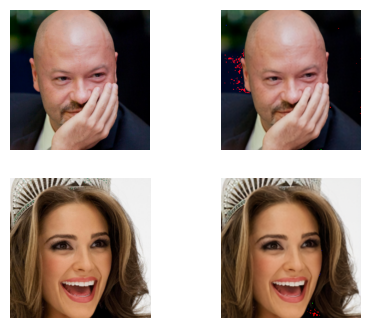

In [19]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def to_uint8(tensor:torch.Tensor):
    tensor = tensor.squeeze(0)
    assert len(tensor.shape)==3,"Tensor should be [C,W,H] or [1,C,W,H]"
    tensor = 127.5*(tensor.cpu().permute(1,2,0)+1)
    return tensor.numpy().astype(np.uint8)

n_samples = 2
fig,ax=plt.subplots(n_samples,2,figsize=(5,n_samples*2))
indexes = torch.randint(0,len(dataset),(n_samples,))

for i,index in enumerate(indexes):
    x,y,n = dataset[index]
    with torch.autocast(device_type="cuda",dtype=torch.float16),torch.no_grad():
        x = x.unsqueeze(0).cuda()
        vae_enc = vae.encode(x).latent_dist
        z = vae_enc.mode()
        #z[:,:,:32,:32]=0
        vae_dec = vae.decode(z)
    ax[i,0].imshow(to_uint8(x))
    ax[i,0].set_axis_off()
    ax[i,1].imshow(to_uint8(vae_dec.sample))
    ax[i,1].set_axis_off()
plt.show()

In this try, well generate the same image with different scales...